In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
import matplotlib.cm as cm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
import os
import numpy as np
from PIL import Image

## 分类手写数字

In [2]:
mnist = fetch_mldata( 'MNIST original', data_home='data/mnist' ) 

In [4]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [6]:
mnist.data.shape

(70000, 784)

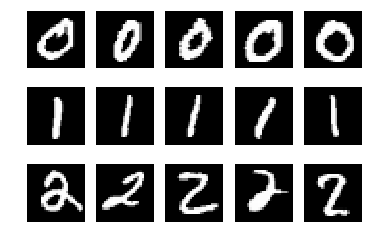

In [5]:
counter = 1
for i in range(3):
    for j in range(1, 6):
        plt.subplot(3, 5, counter)
        plt.imshow( mnist.data[ i * 8000 + j ].reshape((28, 28)),
                    cmap=cm.Greys_r ) 
        plt.axis('off')
        counter += 1
plt.show() 

In [ ]:
x, y = mnist.data, mnist.target
x = x / 255.0*2 - 1
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=11,
                                                    test_size=0.25 )
pipeline = Pipeline([
    ('clf', SVC(kernel='rbf', gamma=0.01, C=100 ))
])
parameters = {
    'clf__gamma': (0.01, 0.03, 0.1, 0.3, 1),
    'clf__C': (0.1, 0.3, 1, 3, 10, 30)
}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=2,
                          verbose=1, scoring='accuracy' )
grid_search.fit( x_train[:10000], y_train[:10000] )
print( 'Best score: {:.3f}'.format( grid_search.best_score_ ) )
print('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted( parameters.keys() ):
    print( '{}:{}'.format(param_name, best_parameters[param_name] ) )
predictions = grid_search.predict(x_test)
print(classification_report(y_test, predictions) )

Fitting 3 folds for each of 30 candidates, totalling 90 fits


上面的代码运行了几十分钟都没有结果，所以就不玩儿它了，主要是花在fit这步骤上了。

## 分类自然图片

In [ ]:
# %load E:\Python_learning\natural_images_classification.py
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
import os
import numpy as np
from PIL import Image

x, y = [], []
filepath = 'E:\\MySQL_data\\English\\Img\\GoodImg\\Bmp'
for path, subdirs, files in os.walk( filepath):
    for filename in files:
        f = os.path.join( path, filename )
        target = filename[3:filename.index('-')]
        img = Image.open(f).convert('L').resize((30,30),
            resample=Image.LANCZOS )
        x.append( np.array(img).reshape(900, ) )
        y.append( target )

x = np.array(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1,
    random_state = 11 )
pipeline = Pipeline([
    ('clf', SVC(kernel='rbf', gamma=0.01, C=100))
    ])
parameters = {
    'clf__gamma': (0.01, 0.03, 0.1, 0.3, 1),
    'clf__C': (0.1, 0.3, 1, 3, 10, 30)
}
if __name__ == '__main__':
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=2,
                              verbose=1, scoring='accuracy' )
    grid_search.fit( x_train, y_train )
    print( 'Best score: {:.3f}'.format( grid_search.best_score_ ) )
    print('Best parameters set:')
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted( parameters.keys() ):
        print( '{}:{}'.format(param_name, best_parameters[param_name] ) )
    predictions = grid_search.predict(x_test)
    print(classification_report(y_test, predictions) )